# modelos lineales clasificacion

In [1]:
# Import data and modules
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data[:, [2, 3]]
y = iris.target

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [18]:
print('Existen {} muestras en el conjunto de entrenamiento y {} muestras en el conjunto de test'.format(
X_train.shape[0], X_test.shape[0]))

Existen 105 muestras en el conjunto de entrenamiento y 45 muestras en el conjunto de test


In [17]:
for z in {c:np.sum(y_train==c) for c in np.unique(y_train)}.items():
    print('Existen {} muestras de la clase {}'.format(z[1],z[0]))

Existen 34 muestras de la clase 0
Existen 32 muestras de la clase 1
Existen 39 muestras de la clase 2


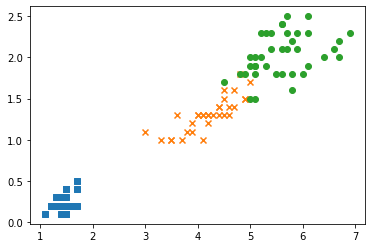

In [34]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

markers = ('s', 'x', 'o')
colors = ('red', 'blue', 'lightgreen')
for idx, cl in enumerate(np.unique(y_train)):
    plt.scatter(x=X_train[y_train == cl, 0], y=X_train[y_train == cl, 1], marker=markers[idx], label=cl)

Ahora ajustamos un modelo lineal de clasificacion con regularizacion (c es el inverso del parametro de regularizacion)

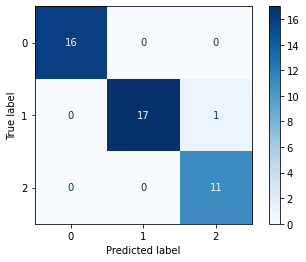

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
    
clf = LogisticRegression(penalty='none',multi_class='multinomial').fit(X_train, y_train)
plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues)

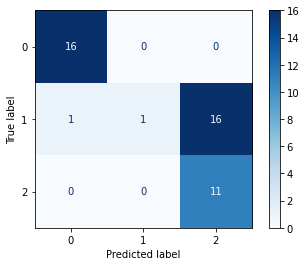

In [92]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss="hinge", alpha=0.01).fit(X_train, y_train)
plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues)